In [1]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]



In [2]:
import pandas as pd
import mlxtend

In [3]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [5]:
data= pd.read_csv("/content/Market_Basket_Optimisation.csv", delimiter= ",", header= None)

df.head()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [6]:
df_res = pd.DataFrame()
for i in range(len(data.columns)):
    df_res = df_res.append(data[i].value_counts()) 
df_res.head(5)


,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,cauliflower,ketchup,cream,body spray,oatmeal,tea,water spray,zucchini,napkins,asparagus
0,577.0,576.0,458.0,391.0,373.0,354.0,325.0,293.0,279.0,270.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,484.0,78.0,11.0,223.0,234.0,411.0,153.0,78.0,302.0,101.0,...,1.0,5.0,1.0,13.0,4.0,5.0,1.0,10.0,NaN,NaN
2,375.0,NaN,NaN,174.0,87.0,279.0,48.0,21.0,225.0,50.0,...,1.0,2.0,1.0,14.0,5.0,4.0,1.0,2.0,NaN,NaN
3,201.0,NaN,NaN,143.0,18.0,167.0,9.0,1.0,181.0,55.0,...,3.0,6.0,1.0,9.0,6.0,1.0,1.0,9.0,1.0,NaN
4,84.0,NaN,NaN,115.0,2.0,62.0,NaN,NaN,134.0,45.0,...,4.0,3.0,1.0,15.0,2.0,4.0,NaN,17.0,2.0,NaN


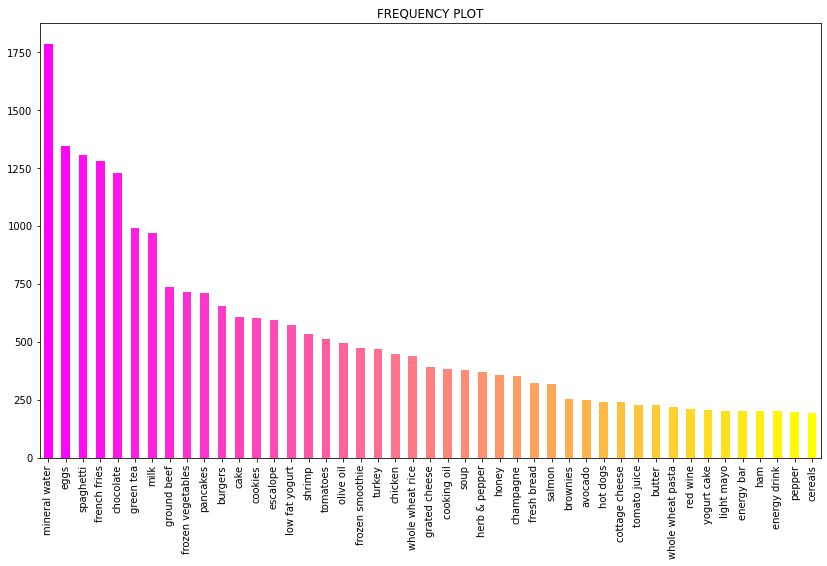

In [7]:
import numpy as np

import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 45 # plot only first 'cnt' values
color = plt.cm.spring(np.linspace(0, 1, cnt))
df_res.sum().sort_values(ascending=False).head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()

In [8]:


import csv

results = []
with open("Market_Basket_Optimisation.csv") as csvfile:
    reader = csv.reader(csvfile) 
    for row in reader: # each row is a list
        results.append(row)
te=TransactionEncoder()
te_ary=te.fit(results).transform(results)
data=pd.DataFrame(te_ary,columns=te.columns_)
data.head()        



,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [9]:
from mlxtend.frequent_patterns import apriori

freq_rules = apriori(data, min_support = 0.01, use_colnames = True)
freq_rules

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, milk, ground beef)"
253,0.017064,"(spaghetti, mineral water, ground beef)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(spaghetti, mineral water, olive oil)"


In [10]:
from mlxtend.frequent_patterns import association_rules 
rules = association_rules(freq_rules, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
158,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
159,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
324,"(spaghetti, mineral water)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,2,1
329,(ground beef),"(spaghetti, mineral water)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
341,(olive oil),"(spaghetti, mineral water)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,1,2
...,...,...,...,...,...,...,...,...,...,...,...
100,(eggs),(low fat yogurt),0.179709,0.076523,0.016798,0.093472,1.221484,0.003046,1.018696,1,1
152,(green tea),(shrimp),0.132116,0.071457,0.011465,0.086781,1.214449,0.002025,1.016780,1,1
153,(shrimp),(green tea),0.071457,0.132116,0.011465,0.160448,1.214449,0.002025,1.033747,1,1
109,(french fries),(escalope),0.170911,0.079323,0.016398,0.095944,1.209537,0.002841,1.018385,1,1


In [11]:
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
285,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,2,1
320,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,2,1
261,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,2,1
307,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,2,1
215,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,1,1
...,...,...,...,...,...,...,...,...,...,...,...
208,(mineral water),(red wine),0.238368,0.028130,0.010932,0.045861,1.630358,0.004227,1.018584,1,1
340,(mineral water),"(spaghetti, olive oil)",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041,1,2
39,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,1,1
304,(mineral water),"(french fries, spaghetti)",0.238368,0.027596,0.010132,0.042506,1.540263,0.003554,1.015571,1,2
